In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import glob

jtplot.style('grade3',figsize=(20, 10), fscale=2)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# todo specify range of sessions or dates.

In [5]:
rl_sub_data_files = glob.glob('/data/loki_1/data/BIDS/sub-0860/ses-0*/beh/sub-0860_ses0*_task-lokicat_run0*.tsv')

In [6]:
print(rl_sub_data_files)

['/data/loki_1/data/BIDS/sub-0860/ses-03/beh/sub-0860_ses03_task-lokicat_run03_10212020_182505.tsv', '/data/loki_1/data/BIDS/sub-0860/ses-03/beh/sub-0860_ses03_task-lokicat_run05_10212020_184633.tsv', '/data/loki_1/data/BIDS/sub-0860/ses-03/beh/sub-0860_ses03_task-lokicat_run04_10212020_183529.tsv', '/data/loki_1/data/BIDS/sub-0860/ses-03/beh/sub-0860_ses03_task-lokicat_run02_10212020_181453.tsv', '/data/loki_1/data/BIDS/sub-0860/ses-03/beh/sub-0860_ses03_task-lokicat_run01_10212020_180356.tsv', '/data/loki_1/data/BIDS/sub-0860/ses-04/beh/sub-0860_ses04_task-lokicat_run01_10222020_180359.tsv', '/data/loki_1/data/BIDS/sub-0860/ses-04/beh/sub-0860_ses04_task-lokicat_run05_10222020_184736.tsv', '/data/loki_1/data/BIDS/sub-0860/ses-04/beh/sub-0860_ses04_task-lokicat_run04_10222020_183723.tsv', '/data/loki_1/data/BIDS/sub-0860/ses-04/beh/sub-0860_ses04_task-lokicat_run03_10222020_182715.tsv', '/data/loki_1/data/BIDS/sub-0860/ses-04/beh/sub-0860_ses04_task-lokicat_run02_10222020_181640.tsv',

In [7]:
df_list = []

for fn in rl_sub_data_files:
    df = pd.read_csv(fn, index_col=None, sep=r'\,|\t',engine='python').rename(columns=lambda x: x.strip())
    df['session'] = fn[-40:-39]
    df_list.append(df)

dfs = pd.concat(df_list, axis=0, ignore_index=True, sort=False)
dfs_sorted = dfs.sort_values(by=['subj_id', 'session', 'run']).reset_index(drop=True)

In [8]:
dfs_sorted.head()

,trial,subj_id,reward_code,condition,run,LR_choice,value_accuracy,value_LR_solution,reward,cumulative_reward,...,p_id_solution,id_choice,stim_duration,stim_onset,stim_offset,abs_response_time,epoch_length,epoch_trial,epoch_number,session
0,0.0,860.0,8.0,8530.0,1.0,NaN,NaN,82.0,0.0,25.0,...,102.0,NaN,1.492735,0.015009,1.507744,0.765302,35.0,0.0,0.0,2
1,1.0,860.0,8.0,8530.0,1.0,NaN,NaN,82.0,0.0,20.0,...,102.0,NaN,1.491892,5.881291,7.373183,6.631583,35.0,1.0,0.0,2
2,2.0,860.0,8.0,8530.0,1.0,82.0,1.0,82.0,4.0,24.0,...,102.0,102.0,1.490656,14.322356,15.813012,14.756855,35.0,2.0,0.0,2
3,3.0,860.0,8.0,8530.0,1.0,76.0,1.0,76.0,4.0,28.0,...,102.0,102.0,1.489608,20.222032,21.711640,20.736854,35.0,3.0,0.0,2
4,4.0,860.0,8.0,8530.0,1.0,76.0,1.0,76.0,3.0,31.0,...,102.0,102.0,1.491547,25.737062,27.228609,26.294702,35.0,4.0,0.0,2


In [9]:
assert len(dfs_sorted.subj_id.unique()) == 1, 'multiple subs in df'

/home/krista/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


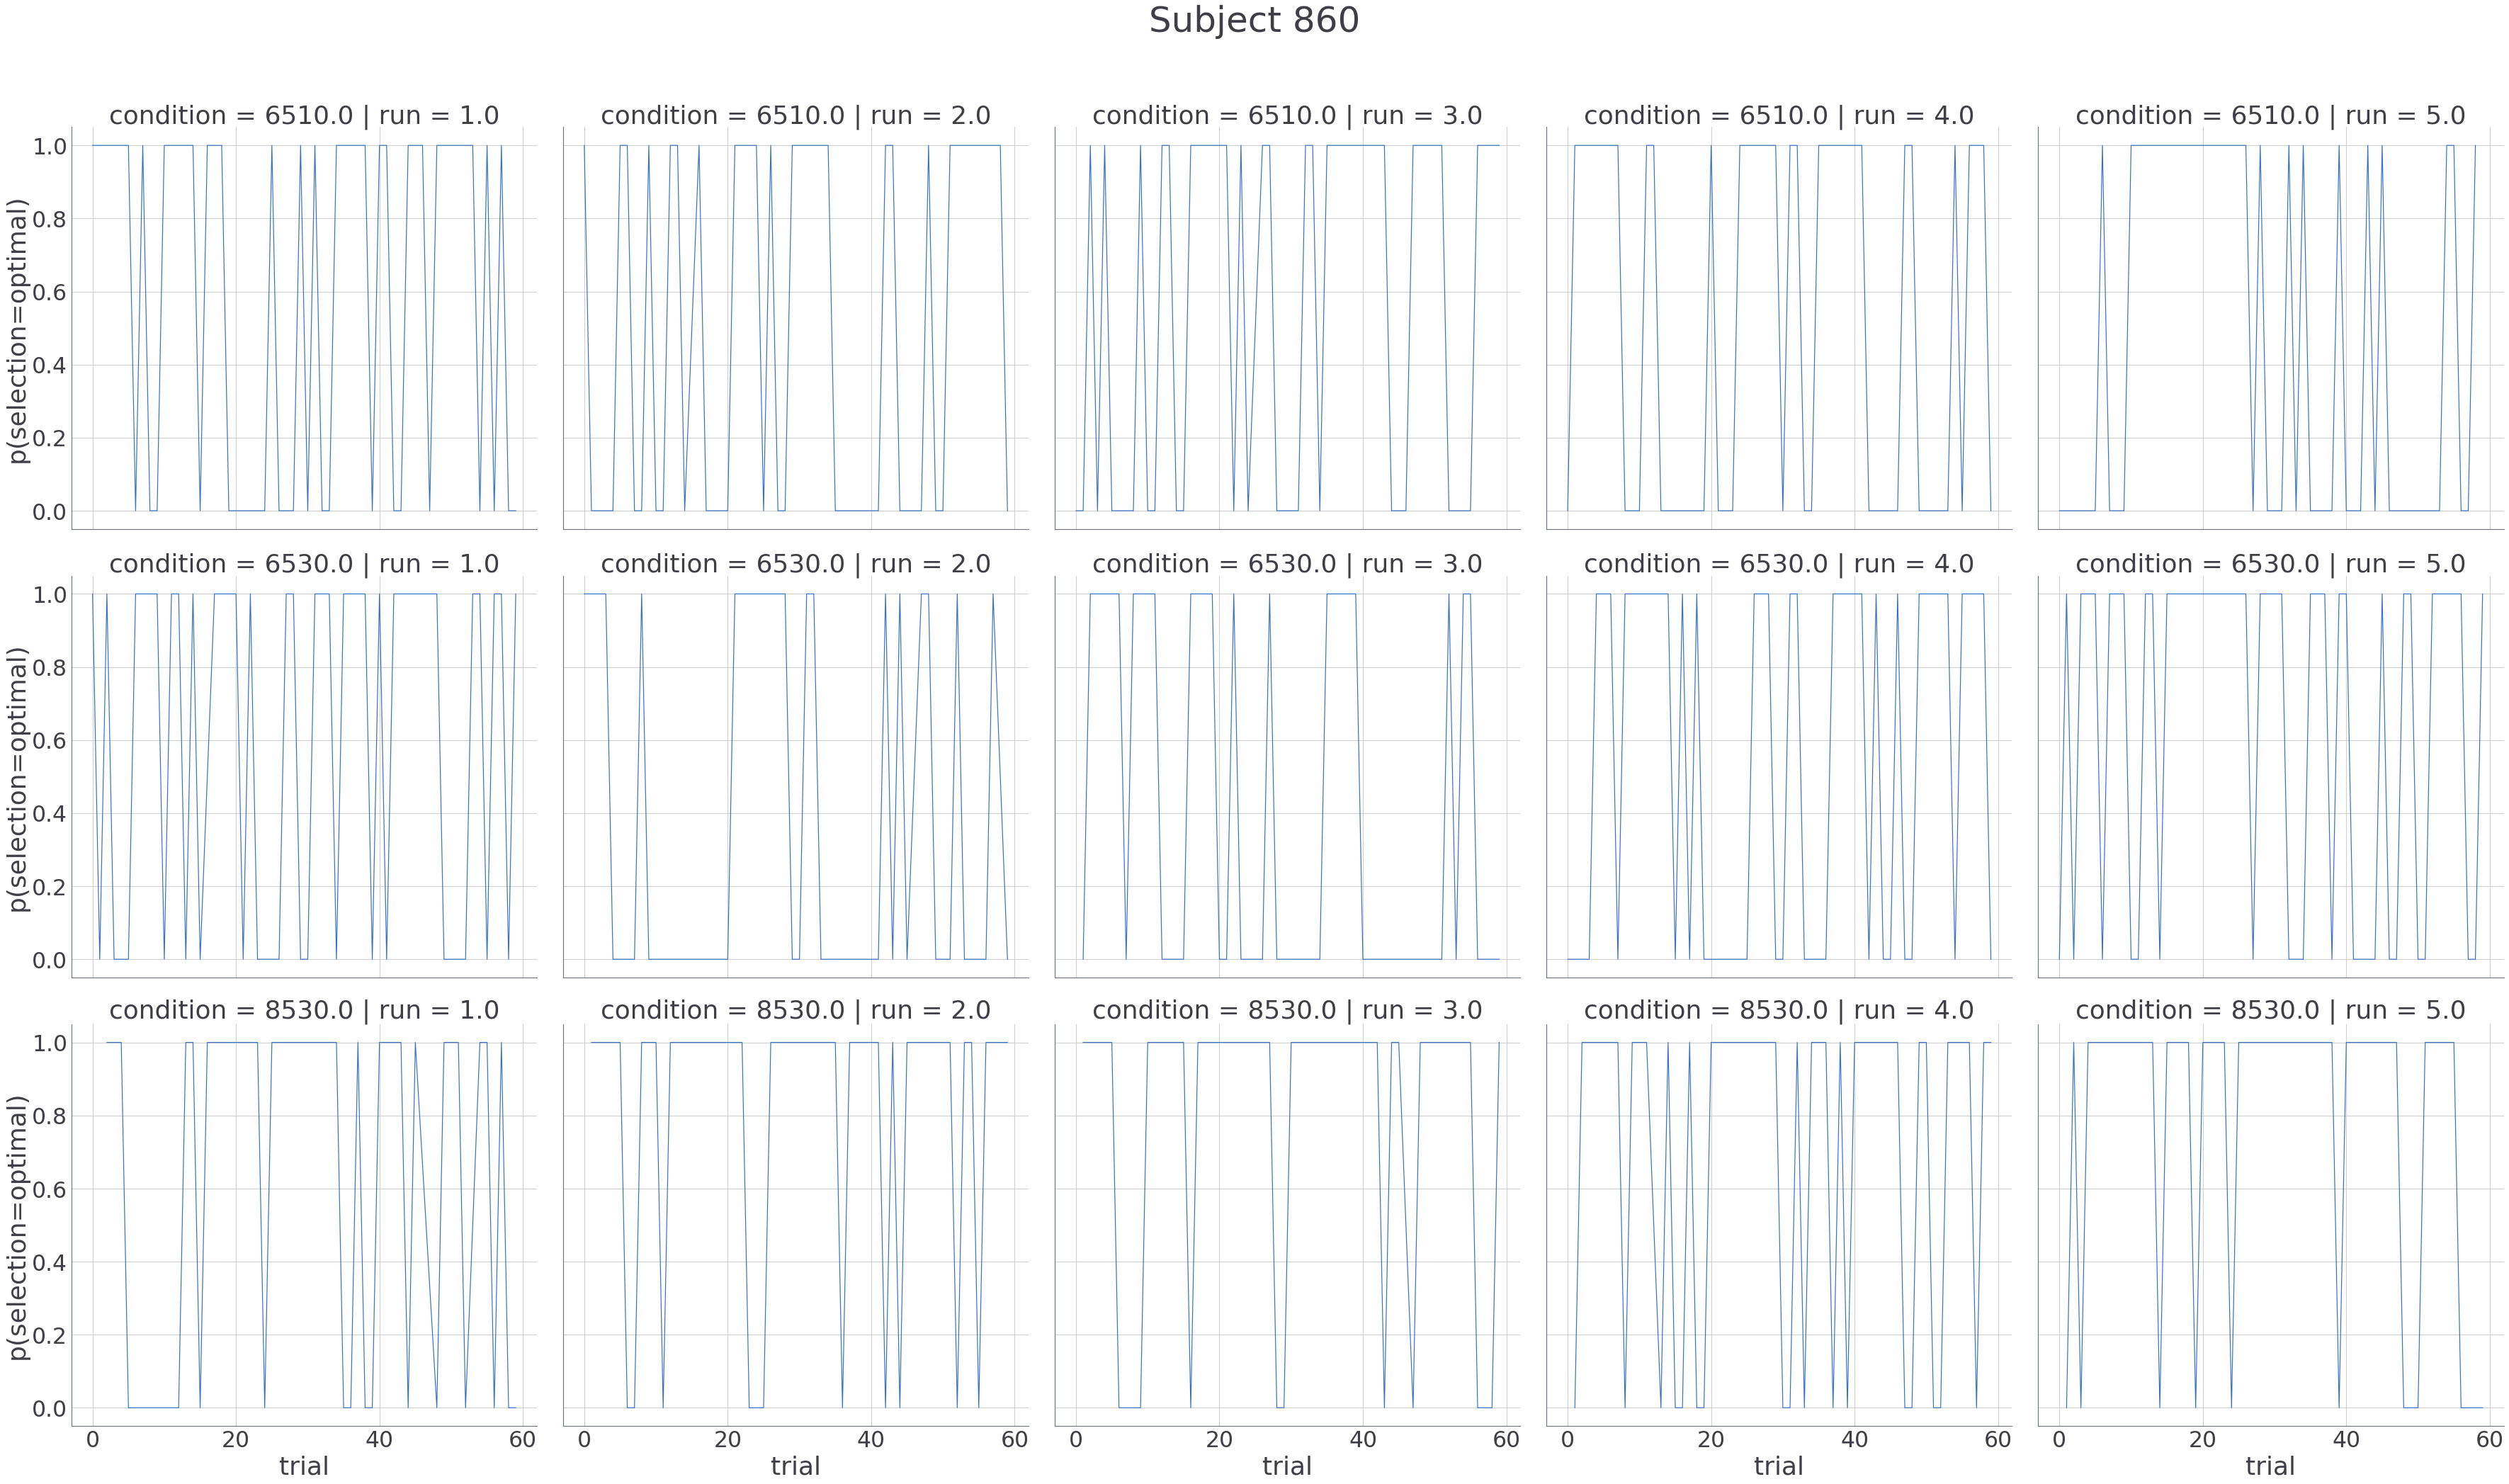

In [10]:
jtplot.style(fscale=3)
g = sns.FacetGrid(dfs_sorted, col="run",  row="condition", size=10)
g.map(plt.plot, "trial", "p_accuracy")

g.fig.suptitle("Subject " + str(int(dfs_sorted.subj_id.unique()[0])), size=50)
g.fig.subplots_adjust(top=.9)

g.set_axis_labels('trial', 'p(selection=optimal)') 

/home/krista/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


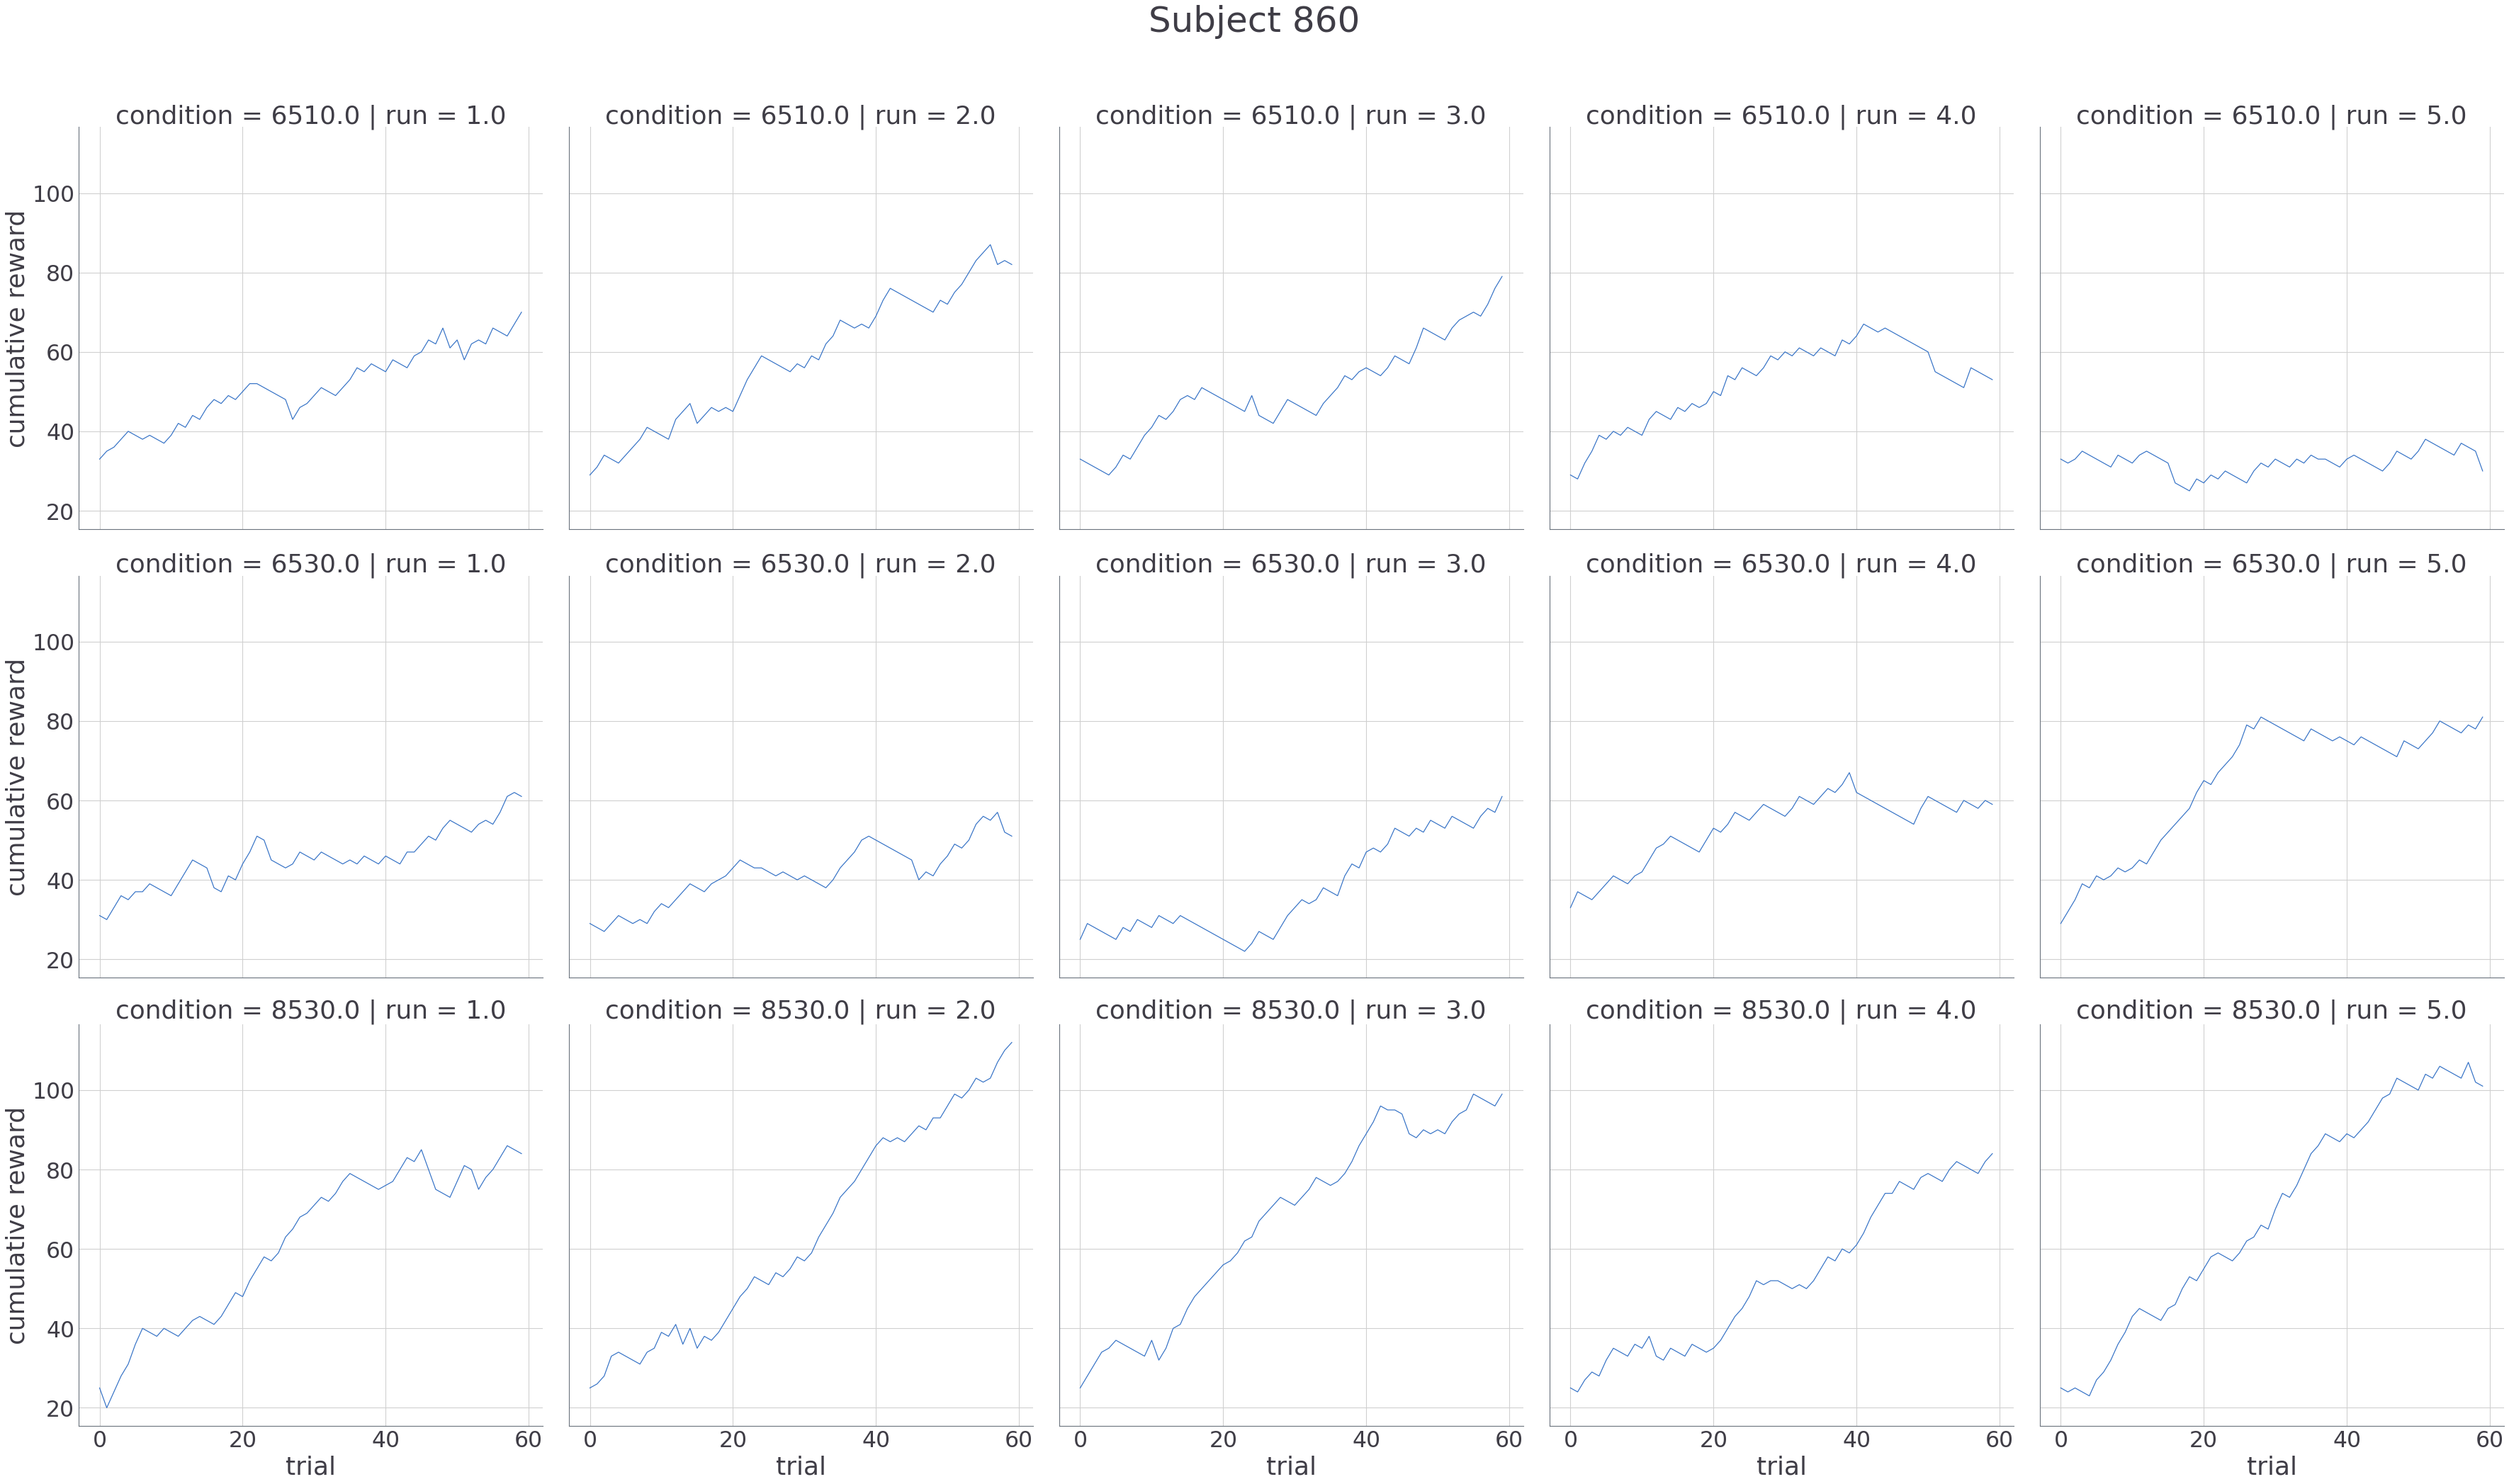

In [11]:
jtplot.style(fscale=3)

g = sns.FacetGrid(dfs_sorted, col="run",  row="condition", size=10)
g.map(plt.plot, "trial", "cumulative_reward")

g.fig.suptitle("Subject " + str(int(dfs_sorted.subj_id.unique()[0])), size=50)
g.fig.subplots_adjust(top=.9)

g.set_axis_labels('trial', 'cumulative reward') 

In [50]:
n_unique_trials_per_session = (dfs_sorted.groupby(['subj_id','session']).trial.count()).unique()

assert len(n_unique_trials_per_session) == 1, 'check n trials per session'

In [51]:
starting_n_points = n_unique_trials_per_session // 2

In [68]:
total_reward_df = pd.DataFrame(dfs_sorted.groupby(['subj_id', 'session'])['reward'].apply(lambda x: sum(x))).reset_index()

In [94]:
total_reward_df.head()

,subj_id,session,reward
0,860.0,2,499.0
1,860.0,3,344.0
2,860.0,4,357.0


In [95]:
total_reward_df['reward_earned'] = total_reward_df.reward - starting_n_points

In [96]:
total_reward_df.head()

,subj_id,session,reward,reward_earned
0,860.0,2,499.0,349.0
1,860.0,3,344.0,194.0
2,860.0,4,357.0,207.0


In [97]:
print('subject ' + str(int(total_reward_df.subj_id.unique()[0])), 'earned $' + str(sum(total_reward_df.reward_earned)/100) + ' over sessions ' + total_reward_df.session.unique().min() + ' to ' + total_reward_df.session.unique().max())

subject 860 earned $7.5 over sessions 2 to 4
